Чернышова Дана Кирилловна

Task 7

In [ ]:
import heapq
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def build_huffman_tree(text):
    freq = Counter(text)
    priority_queue = [[weight, [char, ""]] for char, weight in freq.items()]
    heapq.heapify(priority_queue)

    while len(priority_queue) > 1:
        low = heapq.heappop(priority_queue)
        high = heapq.heappop(priority_queue)

        for pair in low[1:]:
            pair[1] = '0' + pair[1]
        for pair in high[1:]:
            pair[1] = '1' + pair[1]

        heapq.heappush(priority_queue, [low[0] + high[0]] + low[1:] + high[1:])

    huffman_codebook = sorted(heapq.heappop(priority_queue)[1:], key=lambda p: (len(p[-1]), p))
    return {char: code for char, code in huffman_codebook}

def compress_huffman(text, codebook):
    return ''.join(codebook[char] for char in text)

def calculate_compression_ratio(original_text, compressed_text):
    original_bits = len(original_text) * 8  # 8 bits per symbol
    compressed_bits = len(compressed_text)
    return original_bits / compressed_bits

def compress_lzw(text):
    dictionary = {chr(i): i for i in range(256)}
    current_code = 256
    compressed_codes = []
    current_string = ""

    for char in text:
        current_string += char
        if current_string not in dictionary:
            compressed_codes.append(dictionary[current_string[:-1]])
            dictionary[current_string] = current_code
            current_code += 1
            current_string = char

    if current_string:
        compressed_codes.append(dictionary[current_string])

    return compressed_codes, dictionary

def calculate_lzw_compression_ratio(text, compressed_codes):
    original_bits = len(text) * 8
    compressed_bits = len(compressed_codes) * 12  # assuming 12 bits per code
    return original_bits / compressed_bits

def plot_huffman_codebook(huffman_codebook, text):
    freq = Counter(text)
    sorted_chars = sorted(huffman_codebook.items(), key=lambda x: freq[x[0]], reverse=True)
    chars, codes = zip(*sorted_chars)
    frequencies = [freq[char] for char in chars]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=frequencies, y=chars, palette="viridis")
    plt.xlabel("Frequency")
    plt.title("Huffman Codebook: Character Frequencies and Binary Codes")
    plt.show()

def plot_compression_ratios(huffman_ratio, lzw_ratio):
    algorithms = ['Huffman Coding', 'LZW Compression']
    ratios = [huffman_ratio, lzw_ratio]

    plt.figure(figsize=(8, 5))
    sns.barplot(x=algorithms, y=ratios, palette="coolwarm")
    plt.ylabel("Compression Ratio")
    plt.title("Compression Ratio Comparison: Huffman vs LZW")
    plt.show()

def plot_compression_sizes(original_text, compressed_huffman, compressed_lzw):
    original_size = len(original_text) * 8
    compressed_size_huffman = len(compressed_huffman)
    compressed_size_lzw = len(compressed_lzw) * 12

    labels = ['Original', 'Huffman Compressed', 'LZW Compressed']
    sizes = [original_size, compressed_size_huffman, compressed_size_lzw]

    plt.figure(figsize=(8, 5))
    sns.barplot(x=labels, y=sizes, palette="Blues_d")
    plt.ylabel("Size in Bits")
    plt.title("Original vs Compressed Text Sizes")
    plt.show()

C:\Users\dana\AppData\Local\Temp\ipykernel_7496\1810398747.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies, y=chars, palette="viridis")


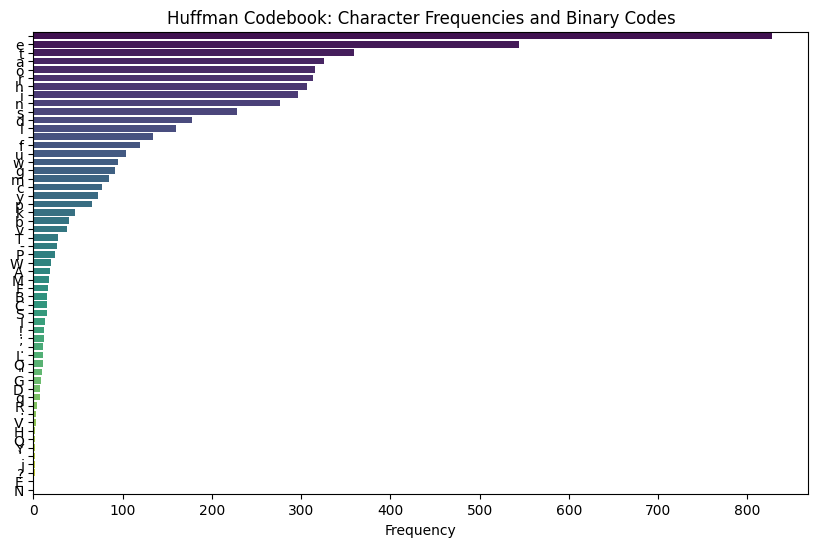

C:\Users\dana\AppData\Local\Temp\ipykernel_7496\1810398747.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=sizes, palette="Blues_d")


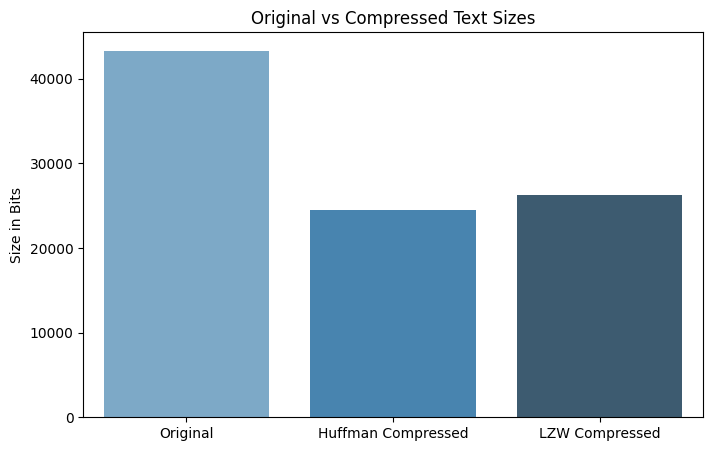

In [4]:
text = 'On the Mountains of the Prairie,\
On the great Red Pipe-stone Quarry,\
Gitche Manito, the mighty,\
He the Master of Life, descending,\
On the red crags of the quarry\
Stood erect, and called the nations,\
Called the tribes of men together.\
  From his footprints flowed a river,\
Leaped into the light of morning,\
O`er the precipice plunging downward\
Gleamed like Ishkoodah, the comet.\
And the Spirit, stooping earthward,\
With his finger on the meadow\
Traced a winding pathway for it,\
Saying to it, "Run in this way!"\
  From the red stone of the quarry\
With his hand he broke a fragment,\
Moulded it into a pipe-head,\
Shaped and fashioned it with figures;\
From the margin of the river\
Took a long reed for a pipe-stem,\
With its dark green leaves upon it;\
Filled the pipe with bark of willow,\
With the bark of the red willow;\
Breathed upon the neighboring forest,\
Made its great boughs chafe together,\
Till in flame they burst and kindled;\
And erect upon the mountains,\
Gitche Manito, the mighty,\
Smoked the calumet, the Peace-Pipe,\
As a signal to the nations.\
  And the smoke rose slowly, slowly,\
Through the tranquil air of morning,\
First a single line of darkness,\
Then a denser, bluer vapor,\
Then a snow-white cloud unfolding,\
Like the tree-tops of the forest,\
Ever rising, rising, rising,\
Till it touched the top of heaven,\
Till it broke against the heaven,\
And rolled outward all around it.\
  From the Vale of Tawasentha,\
From the Valley of Wyoming,\
From the groves of Tuscaloosa,\
From the far-off Rocky Mountains,\
From the Northern lakes and rivers \
All the tribes beheld the signal,\
Saw the distant smoke ascending,\
The Pukwana of the Peace-Pipe.\
  And the Prophets of the nations\
Said: "Behold it, the Pukwana!\
By this signal from afar off,\
Bending like a wand of willow,\
Waving like a hand that beckons,\
Gitche Manito, the mighty,\
Calls the tribes of men together,\
Calls the warriors to his council!"\
  Down the rivers, o`er the prairies,\
Came the warriors of the nations,\
Came the Delawares and Mohawks,\
Came the Choctaws and Camanches,\
Came the Shoshonies and Blackfeet,\
Came the Pawnees and Omahas,\
Came the Mandans and Dacotahs,\
Came the Hurons and Ojibways,\
All the warriors drawn together\
By the signal of the Peace-Pipe,\
To the Mountains of the Prairie,\
To the great Red Pipe-stone Quarry.\
  And they stood there on the meadow,\
With their weapons and their war-gear,\
Painted like the leaves of Autumn,\
Painted like the sky of morning,\
Wildly glaring at each other;\
In their faces stern defiance,\
In their hearts the feuds of ages,\
The hereditary hatred,\
The ancestral thirst of vengeance.\
  Gitche Manito, the mighty,\
The creator of the nations,\
Looked upon them with compassion,\
With paternal love and pity;\
Looked upon their wrath and wrangling\
But as quarrels among children,\
But as feuds and fights of children!\
  Over them he stretched his right hand,\
To subdue their stubborn natures,\
To allay their thirst and fever,\
By the shadow of his right hand;\
Spake to them with voice majestic\
As the sound of far-off waters,\
Falling into deep abysses,\
Warning, chiding, spake in this wise:--\
  "O my children! my poor children!\
Listen to the words of wisdom,\
Listen to the words of warning,\
From the lips of the Great Spirit,\
From the Master of Life, who made you!\
  "I have given you lands to hunt in,\
I have given you streams to fish in,\
I have given you bear and bison,\
I have given you roe and reindeer,\
I have given you brant and beaver,\
Filled the marshes full of wild-fowl,\
Filled the rivers full of fishes:\
Why then are you not contented?\
Why then will you hunt each other?\
  "I am weary of your quarrels,\
Weary of your wars and bloodshed,\
Weary of your prayers for vengeance,\
Of your wranglings and dissensions;\
All your strength is in your union,\
All your danger is in discord;\
Therefore be at peace henceforward,\
And as brothers live together.\
  "I will send a Prophet to you,\
A Deliverer of the nations,\
Who shall guide you and shall teach you,\
Who shall toil and suffer with you.\
If you listen to his counsels,\
You will multiply and prosper;\
If his warnings pass unheeded,\
You will fade away and perish!\
  "Bathe now in the stream before you,\
Wash the war-paint from your faces,\
Wash the blood-stains from your fingers,\
Bury your war-clubs and your weapons,\
Break the red stone from this quarry,\
Mould and make it into Peace-Pipes,\
Take the reeds that grow beside you,\
Deck them with your brightest feathers,\
Smoke the calumet together,\
And as brothers live henceforward!"\
  Then upon the ground the warriors\
Threw their cloaks and shirts of deer-skin,\
Threw their weapons and their war-gear,\
Leaped into the rushing river,\
Washed the war-paint from their faces.\
Clear above them flowed the water,\
Clear and limpid from the footprints\
Of the Master of Life descending;\
Dark below them flowed the water,\
Soiled and stained with streaks of crimson,\
As if blood were mingled with it!\
  From the river came the warriors,\
Clean and washed from all their war-paint;\
On the banks their clubs they buried,\
Buried all their warlike weapons.\
Gitche Manito, the mighty,\
The Great Spirit, the creator,\
Smiled upon his helpless children!\
  And in silence all the warriors\
Broke the red stone of the quarry,\
Smoothed and formed it into Peace-Pipes,\
Broke the long reeds by the river,\
Decked them with their brightest feathers,\
And departed each one homeward,\
While the Master of Life, ascending,\
Through the opening of cloud-curtains,\
Through the doorways of the heaven,\
Vanished from before their faces,\
In the smoke that rolled around him,\
The Pukwana of the Peace-Pipe!'

huffman_codebook = build_huffman_tree(text)
compressed_text_huffman = compress_huffman(text, huffman_codebook)
compression_ratio = calculate_compression_ratio(text, compressed_text_huffman)

compressed_codes_lzw, dictionary_lzw = compress_lzw(text)
compression_ratio_lzw = calculate_lzw_compression_ratio(text, compressed_codes_lzw)

plot_huffman_codebook(huffman_codebook, text)
# plot_compression_ratios(compression_ratio, compression_ratio_lzw)
plot_compression_sizes(text, compressed_text_huffman, compressed_codes_lzw)

Try to invent and explain an algorithm for embedding the name of a state (from Afghanistan to Zimbabwe https://en.wikipedia.org/wiki/List_of_sovereign_states) in some world-wide data-set for some ML task. No code required. Only idea and its brief description.

Hierarchical Encoding -> use hierarchical data about states (e.g., continent, region, GDP class) to create multi-level features that provide more contextual information about each state -> to avoid having state names influencing ML models disproportionately, the state name could be preprocessed or encoded in a way that reduces bias, such as applying hashing tricks or using embeddings that align the state's geographical or political features.